In [576]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [577]:
df_notfresh = pd.read_csv('https://raw.githubusercontent.com/MacounVladimir/UIN/main/water_potability.csv', sep=',')
df = df_notfresh.dropna() #zbavení se chybějících dat (Na, NaN)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


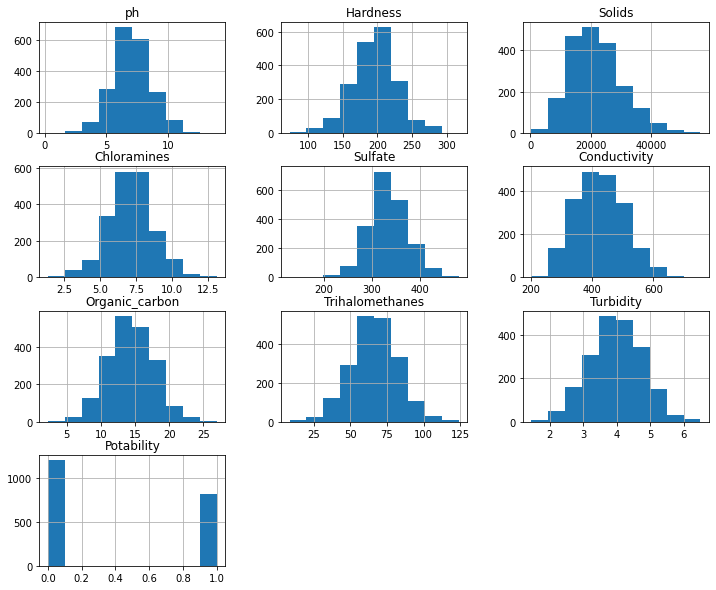

In [578]:
_ = df.hist(figsize=(12,10))

In [579]:
#sns.pairplot(df,hue="Potability")

<Axes: >

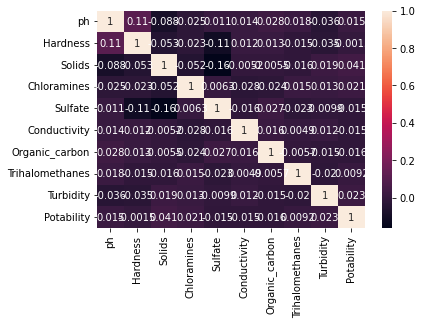

In [580]:
sns.heatmap(df.corr(), annot= True)

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [582]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [583]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [584]:
sc = StandardScaler()
x = sc.fit_transform(df.drop("Potability", axis=1))
y = df["Potability"].values
y_cat = to_categorical(y)

In [585]:
print(x.shape)
print(y_cat.shape)

(2011, 9)
(2011, 2)


In [586]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=18)

In [587]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [588]:
# Create the model
model = Sequential()
model.add(Dense(32, input_shape=(9,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [589]:
model.compile(Adam(learning_rate=0.05), loss="categorical_crossentropy", metrics=["accuracy"])

In [590]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 32)                320       
                                                                 
 dense_88 (Dense)            (None, 32)                1056      
                                                                 
 dense_89 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,442
Trainable params: 1,442
Non-trainable params: 0
_________________________________________________________________


In [591]:
model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
51/51 - 1s - loss: 0.6866 - accuracy: 0.6014 - 894ms/epoch - 18ms/step
Epoch 2/50
51/51 - 0s - loss: 0.6508 - accuracy: 0.6343 - 86ms/epoch - 2ms/step
Epoch 3/50
51/51 - 0s - loss: 0.6524 - accuracy: 0.6474 - 87ms/epoch - 2ms/step
Epoch 4/50
51/51 - 0s - loss: 0.6070 - accuracy: 0.6878 - 86ms/epoch - 2ms/step
Epoch 5/50
51/51 - 0s - loss: 0.6260 - accuracy: 0.6723 - 98ms/epoch - 2ms/step
Epoch 6/50
51/51 - 0s - loss: 0.6277 - accuracy: 0.6505 - 83ms/epoch - 2ms/step
Epoch 7/50
51/51 - 0s - loss: 0.6235 - accuracy: 0.6530 - 91ms/epoch - 2ms/step
Epoch 8/50
51/51 - 0s - loss: 0.6120 - accuracy: 0.6822 - 113ms/epoch - 2ms/step
Epoch 9/50
51/51 - 0s - loss: 0.6157 - accuracy: 0.6947 - 97ms/epoch - 2ms/step
Epoch 10/50
51/51 - 0s - loss: 0.6099 - accuracy: 0.6884 - 111ms/epoch - 2ms/step
Epoch 11/50
51/51 - 0s - loss: 0.5994 - accuracy: 0.7058 - 87ms/epoch - 2ms/step
Epoch 12/50
51/51 - 0s - loss: 0.6012 - accuracy: 0.6990 - 90ms/epoch - 2ms/step
Epoch 13/50
51/51 - 0s - loss: 0.

In [592]:
y_test[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [593]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

13/13 [==============================] - 0s 2ms/step


In [594]:
y_pred[:5]

array([[0.7022322 , 0.2977679 ],
       [0.7022322 , 0.2977679 ],
       [0.7022322 , 0.2977679 ],
       [0.30880406, 0.6911959 ],
       [0.7022322 , 0.2977679 ]], dtype=float32)

In [595]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [596]:
#přesnost modelu (nejsem schopný to zvednout nad 0.7 (nejvíce 0.66), zkoušel jsem i sigmoid a tanh nebo změnu počtu epoch, poměr testovacích a trénovacích dat, learning rate...)
accuracy_score(y_test_class, y_pred_class)

0.6129032258064516

In [597]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72       226
           1       0.65      0.26      0.37       177

    accuracy                           0.61       403
   macro avg       0.63      0.57      0.55       403
weighted avg       0.62      0.61      0.57       403



In [598]:
confusion_matrix(y_test_class, y_pred_class)

array([[201,  25],
       [131,  46]])

In [599]:
#pro srovnání
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, y_train[:, 1])
    y_pred = mod.predict(X_test)
    print("="*80)
    print(mod)
    print("-"*80)
    print("Accuracy score: {:0.3}".format(accuracy_score(y_test_class,
                                                         y_pred)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred))
    print()

RandomForestClassifier()
--------------------------------------------------------------------------------
Accuracy score: 0.663
Confusion Matrix:
[[203  23]
 [113  64]]

SVC()
--------------------------------------------------------------------------------
Accuracy score: 0.663
Confusion Matrix:
[[205  21]
 [115  62]]

GaussianNB()
--------------------------------------------------------------------------------
Accuracy score: 0.605
Confusion Matrix:
[[206  20]
 [139  38]]

